# Get Input Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import time


trainingLink = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatraining.txt"
dataTest1Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest.txt"
dataTest2Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest2.txt"

# ---- Variables: ----
# tr = training set
# ts1 = test set 1
# ts2 = test set 2
# trainX = training set input values
# trainy = training set target values
# test1X = test set 1 input values
# test1y = test set 1 target values
# test2X = test set 2 input values
# test2y = test set 2 target values


# getting training set
tr = pd.read_csv(trainingLink, sep=",", skiprows=1, header=None)
tr.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
tr = tr.drop(columns=['Id'])
# convert date string to datetime
tr['date'] =  pd.to_datetime(tr['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in tr['date']])
tr.insert(0, 'Day', dates)
tr.insert(1, 'Time', times)
tr = tr.drop(columns=['date'])
# splitting training set
target = tr[tr.columns[-1:]]
target.columns = ["Occupancy"]
trainX = tr[tr.columns[:-1]]
trainy = target


# getting test set 1
ts1 = pd.read_csv(dataTest1Link, sep=",", skiprows=1, header=None)
ts1.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts1 = ts1.drop(columns=['Id'])
# convert date string to datetime
ts1['date'] =  pd.to_datetime(ts1['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts1['date']])
ts1.insert(0, 'Day', dates)
ts1.insert(1, 'Time', times)
ts1 = ts1.drop(columns=['date'])
# splitting training set
target = ts1[ts1.columns[-1:]]
target.columns = ["Occupancy"]
test1X = ts1[ts1.columns[:-1]]
test1y = target


# getting test set 2
ts2 = pd.read_csv(dataTest2Link, sep=",", skiprows=1, header=None)
ts2.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts2 = ts2.drop(columns=['Id'])
# convert date string to datetime
ts2['date'] =  pd.to_datetime(ts2['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts2['date']])
ts2.insert(0, 'Day', dates)
ts2.insert(1, 'Time', times)
ts2 = ts2.drop(columns=['date'])
# splitting training set
target = ts2[ts2.columns[-1:]]
target.columns = ["Occupancy"]
test2X = ts2[ts2.columns[:-1]]
test2y = target

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
x = trainX.copy()
x = x.drop(columns=['Day', 'Time'])

scaler = RobustScaler()
#scaler = MinMaxScaler() 
scaledX = scaler.fit_transform(x)
print(x)
print(scaledX)

      Temperature  Humidity  Light         CO2  HumidityRatio
0           23.18   27.2720  426.0  721.250000       0.004793
1           23.15   27.2675  429.5  714.000000       0.004783
2           23.15   27.2450  426.0  713.500000       0.004779
3           23.15   27.2000  426.0  708.250000       0.004772
4           23.10   27.2000  426.0  704.500000       0.004757
...           ...       ...    ...         ...            ...
8138        21.05   36.0975  433.0  787.250000       0.005579
8139        21.05   35.9950  433.0  789.500000       0.005563
8140        21.10   36.0950  433.0  798.500000       0.005596
8141        21.10   36.2600  433.0  820.333333       0.005621
8142        21.10   36.2000  447.0  821.000000       0.005612

[8143 rows x 5 columns]
[[1.65088757 0.10156452 1.66162847 1.33986656 0.77903789]
 [1.63313609 0.10112903 1.67528035 1.30358632 0.77154191]
 [1.63313609 0.09895161 1.66162847 1.30108424 0.76841904]
 ...
 [0.42011834 0.95540323 1.68893223 1.7264387  1.4092

# Decision Trees

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x, trainy)

In [ ]:
import sys
!{sys.executable} -m pip install graphviz

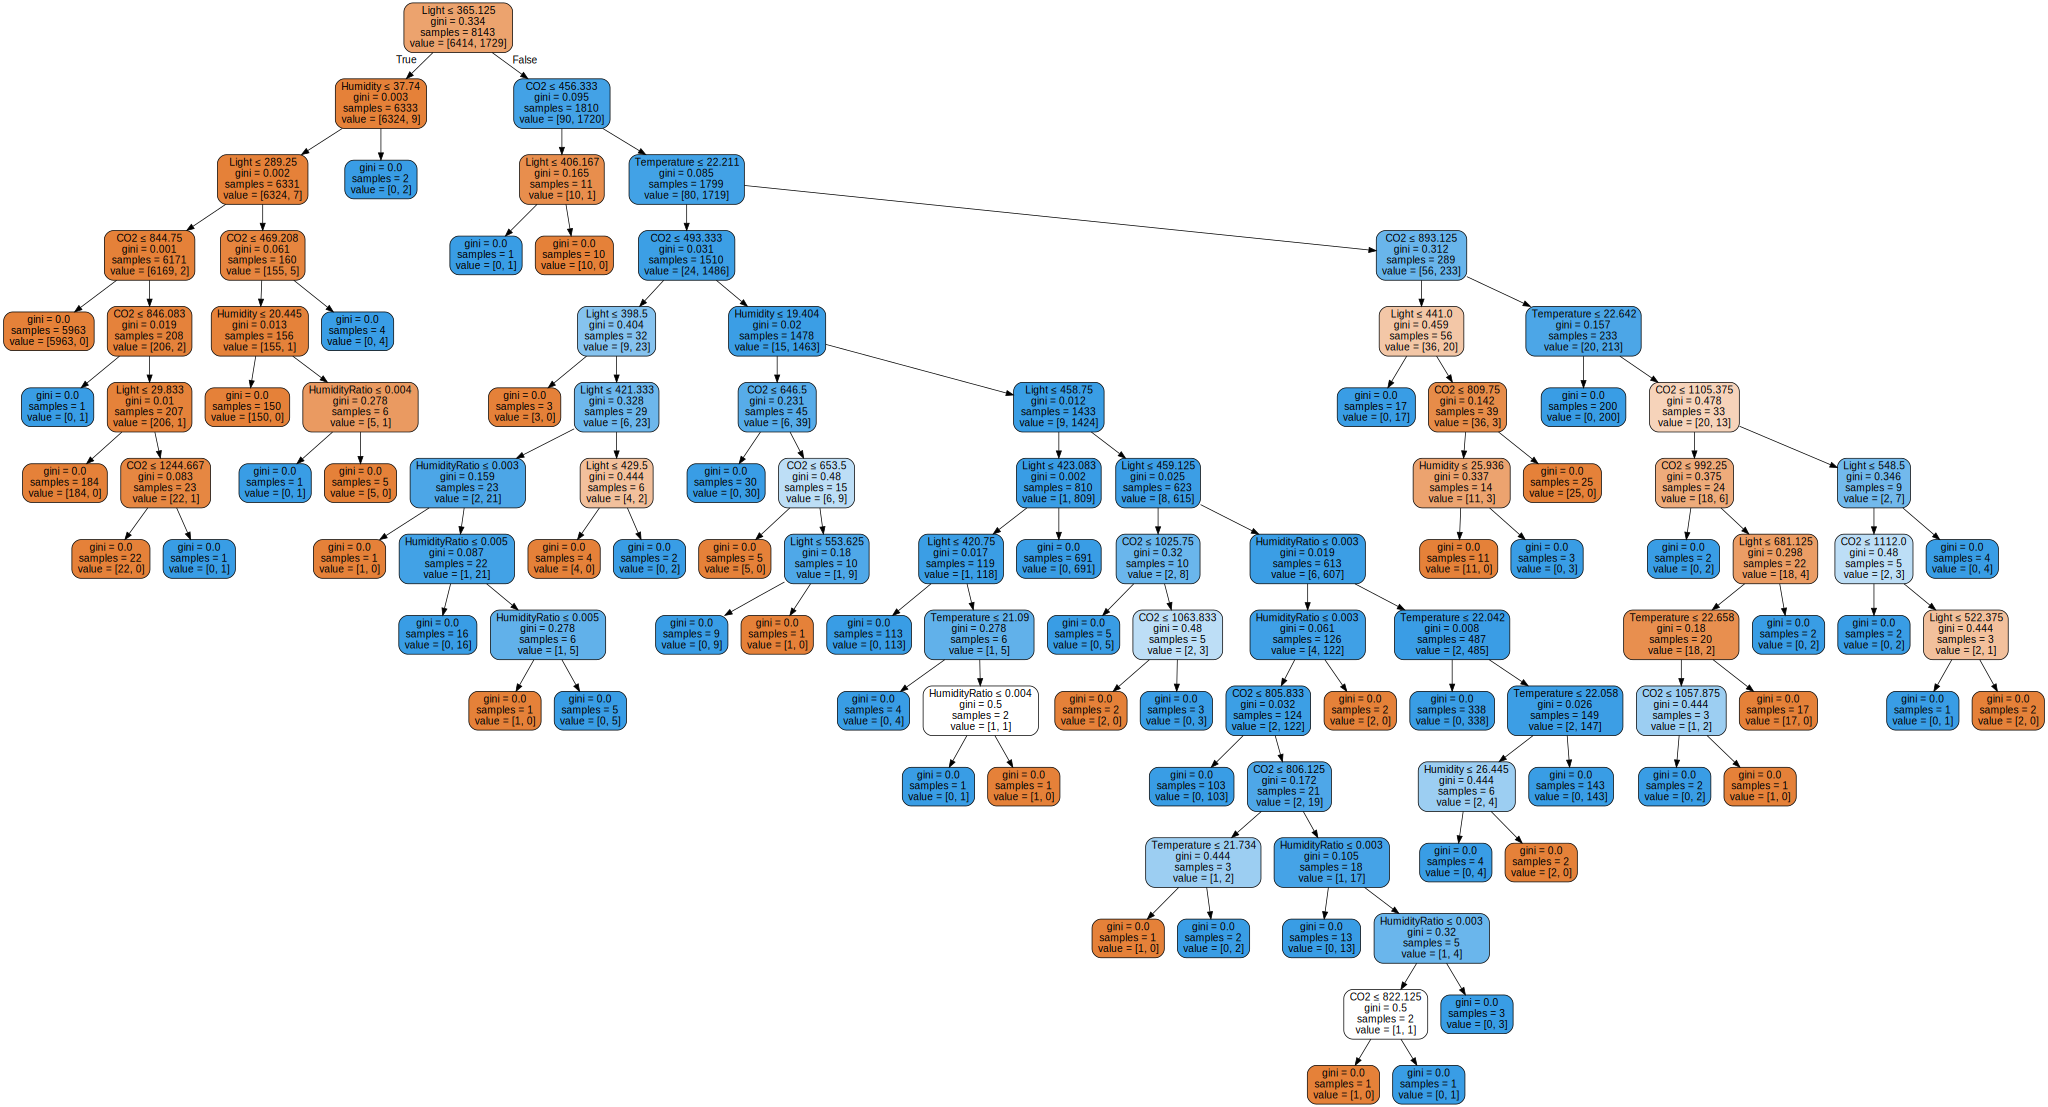

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x.columns, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
y_pred = clf.predict(x)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Accuracy %s' % accuracy_score(trainy, y_pred))
print('F1-score %s' % f1_score(trainy, y_pred, average=None))

Accuracy 1.0
F1-score [1. 1.]


In [ ]:
test1X = test1X.drop(columns=['Day', 'Time'])

In [ ]:
y_pred_ts1 = clf.predict(test1X)

In [ ]:
print('Accuracy %s' % accuracy_score(test1y, y_pred_ts1))
print('F1-score %s' % f1_score(test1y, y_pred_ts1, average=None))
print(classification_report(test1y, y_pred_ts1))
confusion_matrix(test1y, y_pred_ts1)

Accuracy 0.9223264540337711
F1-score [0.94056848 0.88792637]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1693
           1       0.94      0.84      0.89       972

    accuracy                           0.92      2665
   macro avg       0.93      0.91      0.91      2665
weighted avg       0.92      0.92      0.92      2665



array([[1638,   55],
       [ 152,  820]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_list = {'criterion': ['gini', 'entropy'],
              'max_depth': list(np.arange(5, 15)),
              'min_samples_split': [50, 100, 125, 150, 175, 200, 225],
              'min_samples_leaf': [30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100],
             }

In [ ]:
grid_search = GridSearchCV(clf, param_grid=param_list, cv=10)
grid_search.fit(x, trainy)
clf = grid_search.best_estimator_

In [ ]:
report(grid_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.983 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 125}

Model with rank: 1
Mean validation score: 0.983 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 150}

Model with rank: 1
Mean validation score: 0.983 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 175}

Model with rank: 1
Mean validation score: 0.983 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 200}

Model with rank: 1
Mean validation score: 0.983 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 225}

Model with rank: 1
Mean validation score: 0.983 (std: 0.024)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 125}

Model with rank: 1
Mean vali

Training time: 0.016581058502197266


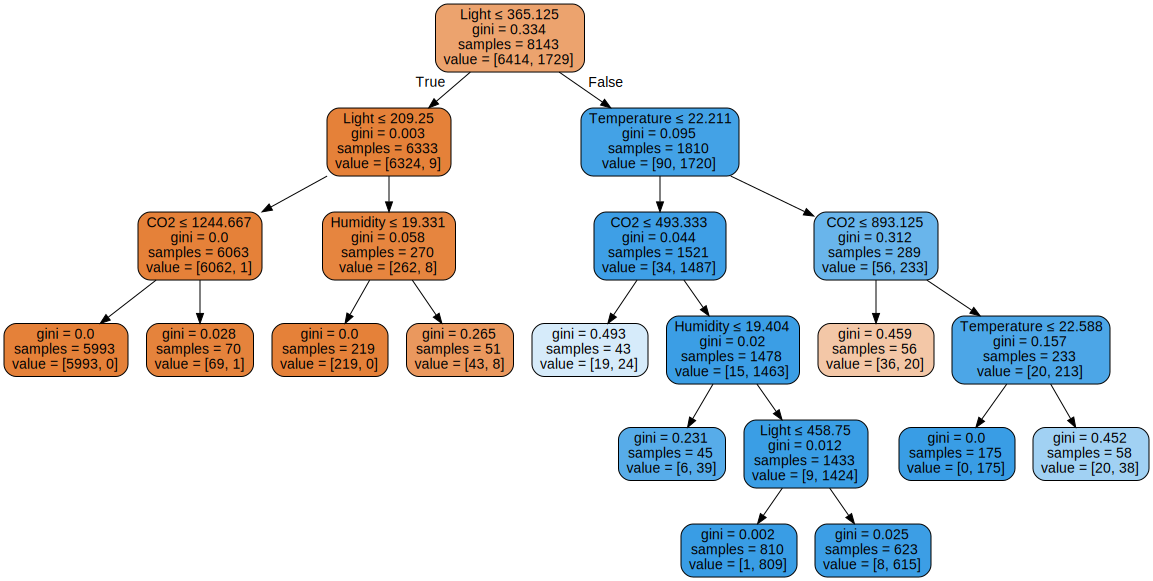

In [ ]:
from graphviz import render
startTrain = time.time()
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, 
                             min_samples_split=125, min_samples_leaf=40)
clf = clf.fit(x, trainy)
endTrain = time.time()
print('Training time: %s' %str(endTrain-startTrain))

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x.columns, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# train
y_pred = clf.predict(x)

print('Accuracy %s' % accuracy_score(trainy, y_pred))
print('F1-score %s' % f1_score(trainy, y_pred, average='weighted'))

Accuracy 0.989807196364976
F1-score 0.9898338253346453
Time: 0.0029141902923583984


In [ ]:
# test1
startT1 = time.time()
y_pred_ts1 = clf.predict(test1X)
endT1 = time.time()

print('Accuracy %s' % accuracy_score(test1y, y_pred_ts1))
print('F1-score %s' % f1_score(test1y, y_pred_ts1, average='weighted'))
print(classification_report(test1y, y_pred_ts1, digits=4))
confusion_matrix(test1y, y_pred_ts1)
print('T1 time: %s' % str(endT1-startT1))

Accuracy 0.9542213883677299
F1-score 0.9538909665393679
              precision    recall  f1-score   support

           0     0.9481    0.9817    0.9646      1693
           1     0.9660    0.9064    0.9352       972

    accuracy                         0.9542      2665
   macro avg     0.9570    0.9440    0.9499      2665
weighted avg     0.9546    0.9542    0.9539      2665

T1 time: 0.0023140907287597656


In [ ]:
# test2
startT2 = time.time()
y_pred_ts2 = clf.predict(test2X)
endT2 = time.time()

print('Accuracy %s' % accuracy_score(test2y, y_pred_ts2))
print('F1-score %s' % f1_score(test2y, y_pred_ts2, average='weighted'))
print(classification_report(test2y, y_pred_ts2, digits=4))
confusion_matrix(test2y, y_pred_ts2)
print('T2 time: %s' % str(endT2-startT2))

Accuracy 0.9521123872026251
F1-score 0.9501341064479534
              precision    recall  f1-score   support

           0     0.9466    0.9956    0.9705      7703
           1     0.9794    0.7887    0.8737      2049

    accuracy                         0.9521      9752
   macro avg     0.9630    0.8921    0.9221      9752
weighted avg     0.9535    0.9521    0.9501      9752

T2 time: 0.0023546218872070312


# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestClassifier(random_state = 42)

In [ ]:
param_list = {'criterion': ['gini'],
              'n_estimators': [100, 300, 500, 800, 1200],
              'max_depth': [None, 2, 5, 10, 20, 50, 75, 100],
              'max_features': ['auto'],
              'min_samples_split': [2, 5, 10, 20, 50, 100],
              'min_samples_leaf': [1, 5, 10, 30, 50],
              'bootstrap': [True],
             }

gridF = GridSearchCV(forest, n_jobs=-1, verbose=1, param_grid=param_list, cv=3)

gridF.fit(x, np.ravel(trainy))
bestF = gridF.best_estimator_

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 61.9min


KeyboardInterrupt: ignored

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(gridF.cv_results_, n_top=10)

##Best RF

In [ ]:
#best_RFC = RandomForestClassifier(random_state = 42, criterion = 'gini', max_depth = 5, max_features = 'auto', min_samples_leaf = 25, min_samples_split = 50, n_estimators = 300)
best_RFC = RandomForestClassifier(random_state = 42, criterion = 'gini', max_depth = 5, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 100, n_estimators = 300)

rfStart = time.time()
best_RFC.fit(x, trainy.values.ravel())
rfEnd = time.time()

#test1X = test1X.drop(columns=['Day', 'Time'])
y_pred_ts1 = best_RFC.predict(test1X)
test1End = time.time()

print('Accuracy %s' % accuracy_score(test1y, y_pred_ts1))
print('F1-score %s' % f1_score(test1y, y_pred_ts1, average='weighted'))
print('Precision %s' % precision_score(test1y, y_pred_ts1))
print('Recall %s' % recall_score(test1y, y_pred_ts1))
print(classification_report(test1y, y_pred_ts1, digits=4))
confusion_matrix(test1y, y_pred_ts1)

Accuracy 0.9782363977485928
F1-score 0.9783501694123646
Precision 0.9462890625
Recall 0.9969135802469136
              precision    recall  f1-score   support

           0     0.9982    0.9675    0.9826      1693
           1     0.9463    0.9969    0.9709       972

    accuracy                         0.9782      2665
   macro avg     0.9722    0.9822    0.9768      2665
weighted avg     0.9792    0.9782    0.9784      2665



array([[1638,   55],
       [   3,  969]])

In [ ]:
#test2X = test2X.drop(columns=['Day', 'Time'])
test2Start = time.time()
y_pred_ts2 = best_RFC.predict(test2X)
test2End = time.time()

print('Accuracy %s' % accuracy_score(test2y, y_pred_ts2))
print('F1-score %s' % f1_score(test2y, y_pred_ts2, average='weighted'))
print('Precision %s' % precision_score(test2y, y_pred_ts2))
print('Recall %s' % recall_score(test2y, y_pred_ts2))
print(classification_report(test2y, y_pred_ts2, digits=4))
confusion_matrix(test2y, y_pred_ts2)

Accuracy 0.9929245283018868
F1-score 0.9929562643569573
Precision 0.9714285714285714
Recall 0.9956076134699854
              precision    recall  f1-score   support

           0     0.9988    0.9922    0.9955      7703
           1     0.9714    0.9956    0.9834      2049

    accuracy                         0.9929      9752
   macro avg     0.9851    0.9939    0.9894      9752
weighted avg     0.9931    0.9929    0.9930      9752



array([[7643,   60],
       [   9, 2040]])

In [ ]:
# train
y_pred = best_RFC.predict(x)

print('Accuracy %s' % accuracy_score(trainy, y_pred))
print('F1-score %s' % f1_score(trainy, y_pred, average='weighted'))

Accuracy 0.9896843915019035
F1-score 0.9897625281155866


In [ ]:
# tempi RF
print('RF training: %s' % str(rfEnd - rfStart))
print('Complement test 1: %s' % str(test1End - rfEnd))
print('RF test 2: %s' % str(test2End - test2Start))

RF training: 1.3994603157043457
Complement test 1: 0.05508995056152344
RF test 2: 0.1486198902130127


# Naive Bayesian

In [ ]:
test1X = test1X.drop(columns=['Day', 'Time'])
test2X = test2X.drop(columns=['Day', 'Time'])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

In [ ]:
# timer per calcolo dei tempi
start = time.time()

# training Gaussian
gnb = GaussianNB()
gaussian = gnb.fit(x, trainy.values.ravel())

trainGauss = time.time()

# training Complement
cnb = ComplementNB()
complement = cnb.fit(x, trainy.values.ravel())

trainComp = time.time()

# predictions Gaussian
gaussT1 = gaussian.predict(test1X)
gaussT1time = time.time()
gaussT2 = gaussian.predict(test2X)
gaussT2time = time.time()

# predictions Complement
compT1 = complement.predict(test1X)
compT1time = time.time()
compT2 = complement.predict(test2X)
compT2time = time.time()

# calcolo tempi di esecuzione
gaussianTraining = trainGauss - start         # tempo di training di Gaussian
complementTraining = trainComp - trainGauss   # tempo di training di Complement
gaussianTest1 = gaussT1time - trainComp       # tempo di predict test1 Gaussian
gaussianTest2 = gaussT2time - gaussT1time     # tempo di predict test2 Gaussian
complementTest1 = compT1time - gaussT2time    # tempo di predict test1 Complement
complementTest2 = compT2time - compT1time     # tempo di predict test2 Complement

In [ ]:
# accuracy
print('Accuracy Gaussian T1 %s' % accuracy_score(test1y, gaussT1))
print('Accuracy Gaussian T2 %s' % accuracy_score(test2y, gaussT2))
print('Accuracy Complement T1 %s' % accuracy_score(test1y, compT1))
print('Accuracy Complement T2 %s' % accuracy_score(test2y, compT2))
print()
# tempi Gaussian
print('Gaussian training: %s' % str(gaussianTraining))
print('Gaussian test 1: %s' % str(gaussianTest1))
print('Gaussian test 2: %s' % str(gaussianTest2))
print()
# tempi Complement
print('Complement training: %s' % str(complementTraining))
print('Complement test 1: %s' % str(complementTest1))
print('Complement test 2: %s' % str(complementTest2))

Accuracy Gaussian T1 0.9774859287054409
Accuracy Gaussian T2 0.9875922887612797
Accuracy Complement T1 0.9711069418386492
Accuracy Complement T2 0.9400123051681706

Gaussian training: 0.0055887699127197266
Gaussian test 1: 0.0020279884338378906
Gaussian test 2: 0.002475261688232422

Complement training: 0.0038394927978515625
Complement test 1: 0.0010824203491210938
Complement test 2: 0.0012135505676269531


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
start = time.time()
bnb = BernoulliNB()
bernoulli = bnb.fit(x, trainy.values.ravel())
trainBern = time.time()

# predictions Bernoulli
bernT1 = bernoulli.predict(test1X)
bernT1time = time.time()
bernT2 = bernoulli.predict(test2X)
bernT2time = time.time()

In [ ]:
print('Accuracy Bernoulli T1 %s' % accuracy_score(test1y, bernT1))
print('Accuracy Bernoulli T2 %s' % accuracy_score(test2y, bernT2))
print()
# tempi Bernoulli
print('Bernoulli training: %s' % str(trainBern - start))
print('Bernoulli test 1: %s' % str(bernT1time - trainBern))
print('Bernoulli test 2: %s' % str(bernT2time - bernT1time))

Accuracy Bernoulli T1 0.9707317073170731
Accuracy Bernoulli T2 0.8248564397046759

Bernoulli training: 0.008021116256713867
Bernoulli test 1: 0.0022411346435546875
Bernoulli test 2: 0.0019352436065673828


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# timer per calcolo dei tempi
start = time.time()

# training KNN
neigh = KNeighborsClassifier(n_neighbors=90) # sqrt(n)
neigh.fit(x, trainy.values.ravel())

trainEnd = time.time()

# predictions KNN
pred1 = neigh.predict(test1X)
knnT1time = time.time()
pred2 = neigh.predict(test2X)
knnT2time = time.time()

# calcolo tempi di esecuzione
trainTime = trainEnd - start        # tempo di training di KNN
test1Time = knnT1time - trainEnd    # tempo di predict test1 KNN
test2Time = knnT2time - knnT1time   # tempo di predict test2 KNN

In [ ]:
print('Accuracy KNN T1 %s' % accuracy_score(test1y, pred1))
print('Accuracy KNN T2 %s' % accuracy_score(test2y, pred2))
print()

print('KNN training: %s' % str(trainTime))
print('KNN test 1: %s' % str(test1Time))
print('KNN test 2: %s' % str(test2Time))

Accuracy KNN T1 0.9778611632270169
Accuracy KNN T2 0.968929450369155

KNN training: 0.0236666202545166
KNN test 1: 0.11770963668823242
KNN test 2: 0.4032461643218994
